In [32]:
import talib
import pandas as pd
%matplotlib inline

def get_data(symbol):
    data = pd.read_csv('data/{}.csv'.format(symbol))
    data['date'] = data['date'].apply(lambda x: str(x))
    data.set_index('date', inplace=True)
    data.sort_index(ascending=True, inplace=True)
    data.index = pd.to_datetime(data.index)
    data['openinterest'] = 0
    data = data[['open', 'high', 'low', 'close', 'volume', 'openinterest']]
    return data

symbol = '^NDX'
data = get_data(symbol)

# data = data[data.index>'20220101']
data

,open,high,low,close,volume,openinterest
date,,,,,,
1985-10-01,110.620003,112.160004,110.565002,112.139999,153160000,0
1985-10-02,112.139999,112.540001,110.779999,110.824997,164640000,0
1985-10-03,110.839996,111.184998,110.120003,110.870003,147300000,0
1985-10-04,110.870003,110.870003,109.855003,110.074997,147900000,0
1985-10-07,110.074997,110.135002,108.175003,108.199997,128640000,0
...,...,...,...,...,...,...
2024-06-12,19358.259766,19556.900391,19347.279297,19465.179688,5560630000,0
2024-06-13,19609.050781,19639.449219,19473.710938,19576.919922,4916020000,0
2024-06-14,19557.220703,19664.589844,19534.619141,19659.800781,4973820000,0


In [33]:
data['ma_20'] = talib.EMA(data['close'],20)
data['ma_5'] = talib.EMA(data['close'],5)
data

,open,high,low,close,volume,openinterest,ma_20,ma_5
date,,,,,,,,
1985-10-01,110.620003,112.160004,110.565002,112.139999,153160000,0,NaN,NaN
1985-10-02,112.139999,112.540001,110.779999,110.824997,164640000,0,NaN,NaN
1985-10-03,110.839996,111.184998,110.120003,110.870003,147300000,0,NaN,NaN
1985-10-04,110.870003,110.870003,109.855003,110.074997,147900000,0,NaN,NaN
1985-10-07,110.074997,110.135002,108.175003,108.199997,128640000,0,NaN,110.421999
...,...,...,...,...,...,...,...,...
2024-06-12,19358.259766,19556.900391,19347.279297,19465.179688,5560630000,0,18782.511200,19183.500897
2024-06-13,19609.050781,19639.449219,19473.710938,19576.919922,4916020000,0,18858.169174,19314.640572
2024-06-14,19557.220703,19664.589844,19534.619141,19659.800781,4973820000,0,18934.515041,19429.693975


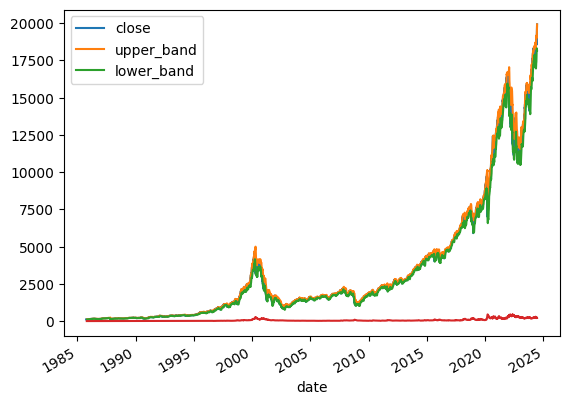

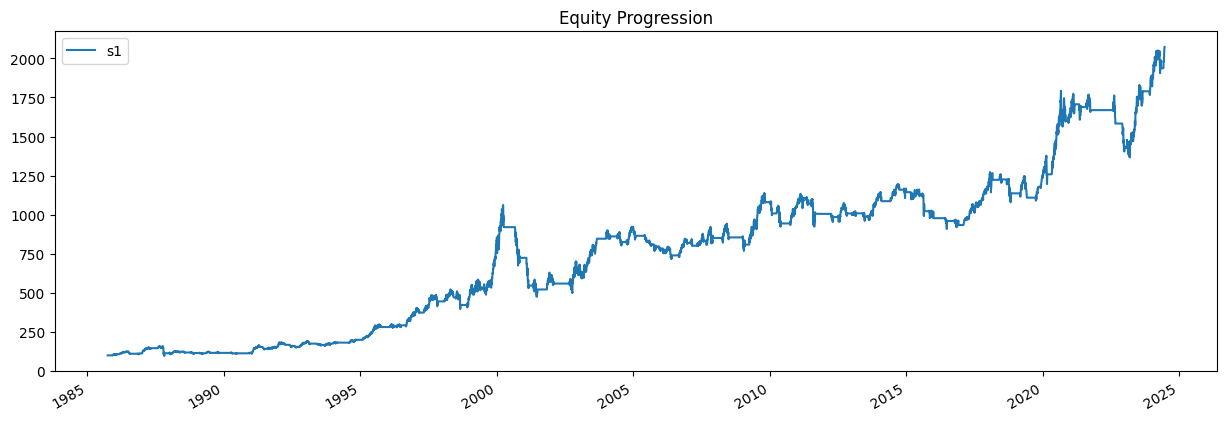

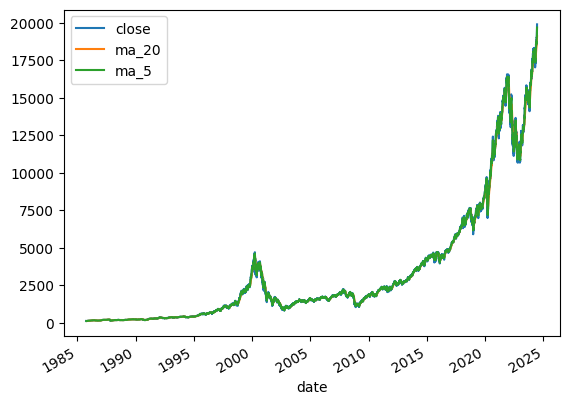

In [34]:
import matplotlib.pyplot as plt
data[['close','ma_20','ma_5']].plot()
plt.show()

In [35]:
data['macd'], data['signal'], _ = talib.MACD(data['close'], fastperiod=12, slowperiod=26, signalperiod=9)

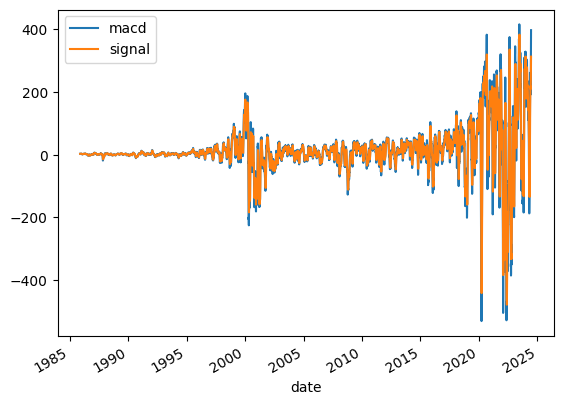

In [36]:
import matplotlib.pyplot as plt
data[['macd','signal']].plot()
plt.show()

In [37]:
data['upper_band'], data['middle_band'], data['lower_band'] = talib.BBANDS(data['close'], 
                                                      timeperiod=20, 
                                                      nbdevup=2, 
                                                      nbdevdn=2, 
                                                      matype=0)

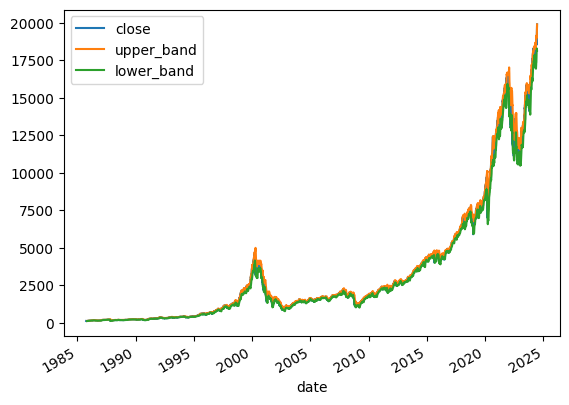

In [38]:
import matplotlib.pyplot as plt
data[['close','upper_band','lower_band']].plot()
plt.show()

In [39]:
atr = talib.ATR(data['high'], data['low'], data['close'], timeperiod=14)
atr

date
1985-10-01           NaN
1985-10-02           NaN
1985-10-03           NaN
1985-10-04           NaN
1985-10-07           NaN
                 ...    
2024-06-12    226.352043
2024-06-13    222.631863
2024-06-14    216.013209
2024-06-17    225.878616
2024-06-18    217.075902
Length: 9757, dtype: float64

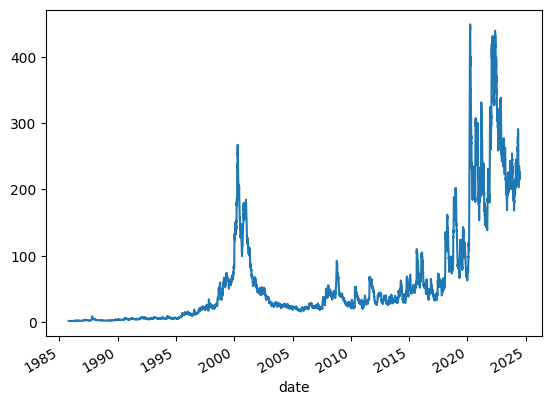

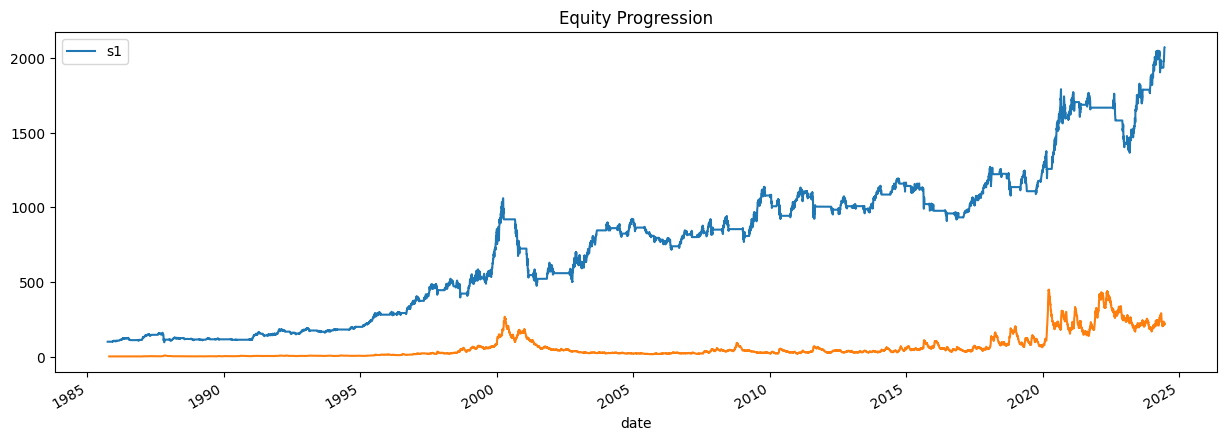

In [47]:
atr.plot()
plt.show()

In [41]:
data

,open,high,low,close,volume,openinterest,ma_20,ma_5,macd,signal,upper_band,middle_band,lower_band
date,,,,,,,,,,,,,
1985-10-01,110.620003,112.160004,110.565002,112.139999,153160000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-10-02,112.139999,112.540001,110.779999,110.824997,164640000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-10-03,110.839996,111.184998,110.120003,110.870003,147300000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-10-04,110.870003,110.870003,109.855003,110.074997,147900000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-10-07,110.074997,110.135002,108.175003,108.199997,128640000,0,NaN,110.421999,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-12,19358.259766,19556.900391,19347.279297,19465.179688,5560630000,0,18782.511200,19183.500897,283.609558,239.269527,19301.637782,18798.515039,18295.392296
2024-06-13,19609.050781,19639.449219,19473.710938,19576.919922,4916020000,0,18858.169174,19314.640572,311.822789,253.780179,19444.651766,18847.528516,18250.405265
2024-06-14,19557.220703,19664.589844,19534.619141,19659.800781,4973820000,0,18934.515041,19429.693975,336.985215,270.421186,19580.560797,18902.620508,18224.680218


In [42]:
import bt
import numpy as np

close = data[['close']]
upper = data[['upper_band']]
lower = data[['lower_band']]
close.columns=[symbol]
upper.columns=[symbol]
lower.columns=[symbol]

buy = close > upper
sell = close < lower

signal_where = np.where(buy,1,np.nan)
signal_where = np.where(sell,0,signal_where)
signal_where = pd.DataFrame(signal_where,index=close.index,columns=close.columns)
signal_where = signal_where.ffill()
signal_where = signal_where.fillna(0)
signal_where

# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectWhere(signal_where),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [43]:
# create a backtest and run it
test = bt.Backtest(s, close)
res = bt.run(test)

100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


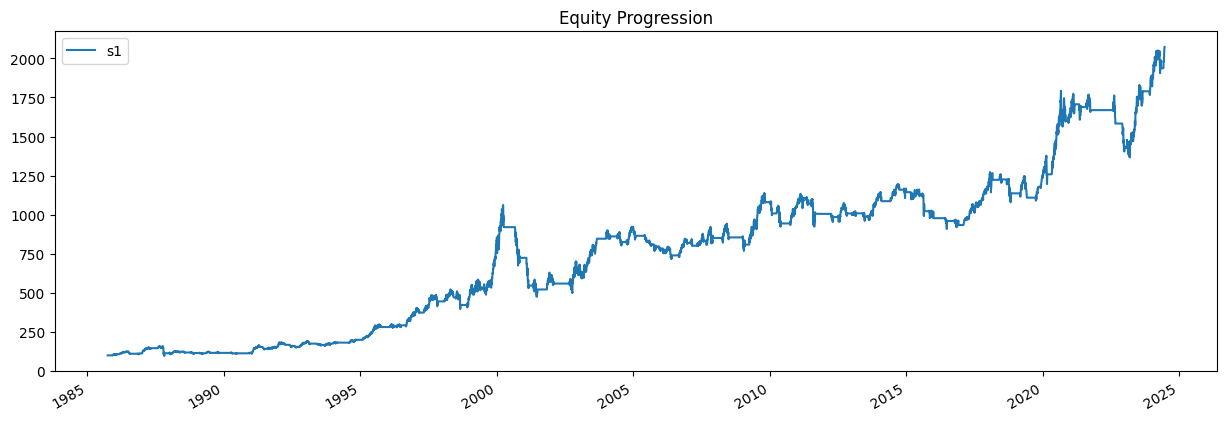

In [48]:
res.plot()
plt.show()

In [45]:
res.stats

,s1
start,1985-09-30 00:00:00
end,2024-06-18 00:00:00
rf,0.0
total_return,19.730485
cagr,0.081451
max_drawdown,-0.55299
calmar,0.147292
mtd,0.070293
three_month,0.030646
six_month,0.107945


In [46]:
res.get_transactions()

,,price,quantity
Date,Security,,
1985-12-02,^NDX,125.184998,7988.0
1986-02-03,^NDX,134.240005,-7988.0
1986-03-03,^NDX,139.740005,7673.0
1986-08-01,^NDX,144.190002,-7673.0
1986-11-03,^NDX,144.809998,7640.0
...,...,...,...
2023-02-01,^NDX,12363.099609,1155.0
2023-09-01,^NDX,15490.860352,-1155.0
2023-12-01,^NDX,15997.580078,1118.0
